**CIFAR10**

10のクラスにラベル付けされた、32x32ピクセルのカラー画像

In [1]:
%matplotlib inline
from __future__ import division, print_function

In [2]:
from keras import backend as K
from keras.datasets import cifar10
from keras.layers import Activation, Convolution2D, Dense, Flatten, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
np.random.seed(0)

データを準備

In [4]:
(X_train, labels_train), (X_test, labels_test) = cifar10.load_data()
labels_train = labels_train.reshape(-1)
labels_test = labels_test.reshape(-1)

In [5]:
print(X_train.shape, labels_train.shape, sep='\n')

(50000, 32, 32, 3)
(50000,)


データをいくつか表示してみる

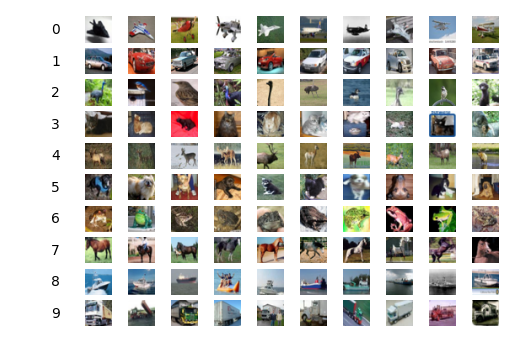

In [6]:
import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image)
        plt.axis('off')
plt.show()
    
del label_images

必要であればデータを整形

**dim_ordering**: 'th'か'tf'． 'th'モードのときはチャネルの次元（深さ）はindex 1に， 'tf'モードではindex 3に

In [7]:
_, n_rows, n_cols, n_channels = X_train.shape
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], n_channels, n_rows, n_cols)
    X_test = X_test.reshape(X_test.shape[0], n_channels, n_rows, n_cols)
    input_shape=(n_channels, n_rows, n_cols)
else:
    input_shape=(n_rows, n_cols, n_channels)

ラベルをone-hotベクトル（値がひとつだけ1で他が0のベクトル）に変換

In [8]:
Y_train = to_categorical(labels_train)
Y_test = to_categorical(labels_test)

畳み込み層をひとつ持つモデルを定義

In [9]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 11s - loss: 1.3987 - acc: 0.5377 - val_loss: 1.3366 - val_acc: 0.5376
Epoch 2/12
50000/50000 [==============================] - 11s - loss: 1.0580 - acc: 0.6736 - val_loss: 1.3237 - val_acc: 0.5495
Epoch 3/12
50000/50000 [==============================] - 11s - loss: 0.8856 - acc: 0.7364 - val_loss: 1.1881 - val_acc: 0.6043
Epoch 4/12
50000/50000 [==============================] - 11s - loss: 0.7447 - acc: 0.7846 - val_loss: 1.0821 - val_acc: 0.6428
Epoch 5/12
50000/50000 [==============================] - 11s - loss: 0.6210 - acc: 0.8291 - val_loss: 1.1836 - val_acc: 0.6025
Epoch 6/12
50000/50000 [==============================] - 11s - loss: 0.5089 - acc: 0.8700 - val_loss: 1.1751 - val_acc: 0.6132
Epoch 7/12
50000/50000 [==============================] - 11s - loss: 0.4104 - acc: 0.9042 - val_loss: 1.1558 - val_acc: 0.6352
Epoch 8/12
50000/50000 [==============================

In [11]:
labels_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(labels_test, labels_pred))

             precision    recall  f1-score   support

          0       0.82      0.41      0.55      1000
          1       0.82      0.70      0.75      1000
          2       0.48      0.54      0.51      1000
          3       0.35      0.51      0.42      1000
          4       0.62      0.46      0.52      1000
          5       0.35      0.68      0.46      1000
          6       0.82      0.59      0.68      1000
          7       0.73      0.60      0.66      1000
          8       0.78      0.74      0.76      1000
          9       0.78      0.68      0.73      1000

avg / total       0.65      0.59      0.60     10000



畳み込み層をふたつ持つモデルを定義

In [12]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 追加　- ここから -
model.add(Convolution2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 追加 - ここまで -
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 16s - loss: 1.3272 - acc: 0.5674 - val_loss: 1.4886 - val_acc: 0.4916
Epoch 2/12
50000/50000 [==============================] - 15s - loss: 0.9947 - acc: 0.6962 - val_loss: 1.0535 - val_acc: 0.6764
Epoch 3/12
50000/50000 [==============================] - 15s - loss: 0.8388 - acc: 0.7449 - val_loss: 0.9920 - val_acc: 0.6768
Epoch 4/12
50000/50000 [==============================] - 15s - loss: 0.7181 - acc: 0.7858 - val_loss: 0.9777 - val_acc: 0.6706
Epoch 5/12
50000/50000 [==============================] - 15s - loss: 0.6168 - acc: 0.8210 - val_loss: 0.9244 - val_acc: 0.6968
Epoch 6/12
50000/50000 [==============================] - 15s - loss: 0.5284 - acc: 0.8515 - val_loss: 0.9339 - val_acc: 0.6944
Epoch 7/12
50000/50000 [==============================] - 15s - loss: 0.4463 - acc: 0.8786 - val_loss: 0.9548 - val_acc: 0.6858
Epoch 8/12
50000/50000 [==============================

In [14]:
labels_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(labels_test, labels_pred))

             precision    recall  f1-score   support

          0       0.65      0.82      0.72      1000
          1       0.87      0.77      0.81      1000
          2       0.65      0.62      0.63      1000
          3       0.50      0.58      0.54      1000
          4       0.66      0.68      0.67      1000
          5       0.61      0.63      0.62      1000
          6       0.83      0.77      0.80      1000
          7       0.86      0.67      0.75      1000
          8       0.88      0.77      0.82      1000
          9       0.78      0.82      0.80      1000

avg / total       0.73      0.71      0.72     10000

